In [ ]:
# 실험 제목 : " 층이 깊어지면 오버피팅이 더 발생하는가 ? "
# fashion mnist 데이터

# 첫번째 모델 : 3층 신경망
# 두번째 모델 : 4층 신경망

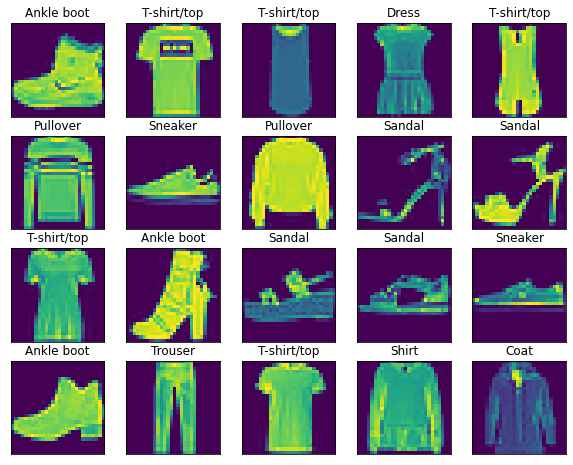

In [2]:
# ▩ fashion mnist 데이터셋 소개

from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = load_data()

target_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

plt.figure(figsize=(10,10))

for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i] )
    plt.title( target_dict[(y_train[i]) ])
    plt.xticks([])
    plt.yticks([])


In [ ]:
# 훈련데이터 60000개, 테스트 데이터 10000개 , shape 도 28x28 로 mnist 와 같습니다.
# mnist 와 차이가 있다면 mnist 는 필기체 숫자 10개인데 
# fasion mnist 는 옷과 신발 같은 의류 이미지 입니다.

In [3]:
# ■ 두개의 모델을 생성하기 위한 공통 코드 부분

# 1. 데이터를 불러옵니다.
from tensorflow.keras.datasets.fashion_mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

# 2. 정규화를 합니다.
x_train = x_train / 255
x_test = x_test / 255


# 3. 정답 데이터를 구성합니다.
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)     # 원핫 인코딩
y_test = to_categorical(y_test)       # 원핫 인코딩
print(y_test.shape)           # (10000,10)

# 4. 훈련 데이터를 훈련데이터와 검정 데이터로 나눕니다.

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, test_size = 0.3, random_state = 777 )



(10000, 10)


In [4]:
# ▩ 첫번째 모델 구성하기 ( 3층 신경망 )

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model1 = Sequential()
model1.add( Flatten( input_shape = (28,28) ) )    # (28.28)    ----> (1, 28*28) 로 변환하는 코드, 0층
model1.add( Dense(64, activation = 'relu') )      # 64개의 뉴런을 가지는 은닉1층
model1.add( Dense(32, activation = 'relu') )      # 32개의 뉴런을 가지는 은닉2층
model1.add( Dense(10, activation = 'softmax') )      # 10개의 뉴런을 가지는 출력층 ( 3층 )


In [ ]:
# ▩ 첫번째 모델에 대한 학습과정을 설정하고 학습시키기

model1.compile( optimizer = 'adam',           # 옵티마이저 : adam
 loss = 'categorical_crossentropy',       # 오차함수 다중분류이므로 categorical_crossentropy
metrics = ['acc'] )       # 모니터링할 평가지표 : 정확도

model1_history = model1.fit( x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val) ) 

# 설명 : model1_history 에 훈련 데이터의 정확도 값과 오차값과 검증 데이터의 정확도값과 오차값이 쌓임


In [6]:
# ▩ 두번째 모델 구성하기 ( 4층 신경망 )


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model2 = Sequential()
model2.add( Flatten( input_shape = (28,28) ) )    # (28.28)    ----> (1, 28*28) 로 변환하는 코드, 0층
model2.add( Dense(128, activation = 'relu') )      # 128개의 뉴런을 가지는 은닉1층
model2.add( Dense(64, activation = 'relu') )      # 64개의 뉴런을 가지는 은닉2층
model2.add( Dense(32, activation = 'relu') )      # 32개의 뉴런을 가지는 은닉3층
model2.add( Dense(10, activation = 'softmax') )      # 10개의 뉴런을 가지는 출력층 ( 4층 )


In [ ]:
# ▩ 두번째 모델의 학습과정을 설정하고 학습 시키기

model2.compile( optimizer = 'adam',           # 옵티마이저 : adam
 loss = 'categorical_crossentropy',       # 오차함수 다중분류이므로 categorical_crossentropy
metrics = ['acc'] )       # 모니터링할 평가지표 : 정확도

model2_history = model2.fit( x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val) ) 


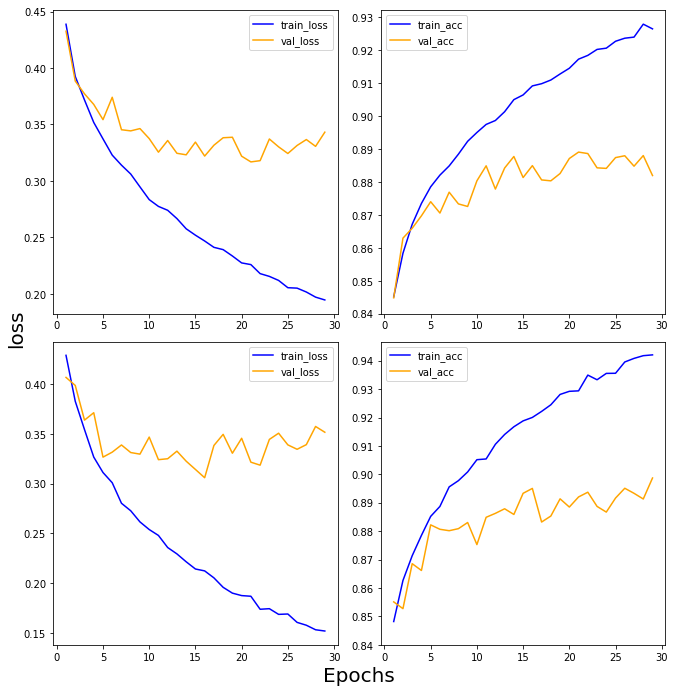

In [8]:
# ▩ 두개의 모델의 학습과정을 같이 시각화 하시오 !

import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc( model1_history, model2_history, 30)


In [ ]:
# ※ 정확도는 두번째 모델이 더 우수합니다. 
#    그러나 파라미터의 수가 많아졌기 때문에 과대적합 문제에 더 많이 노출되었습니다.